# Classification Model #

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
pd.set_option('display.max_columns', 100)

In [274]:
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [173]:
pokemon = pd.read_csv('data/pokemon_battle_final.csv').drop('Unnamed: 0', axis=1)

In [174]:
print(pokemon.shape)
pokemon.head()

(50000, 35)


,id_p1,name_p1,type1_p1,type2_p1,hp_p1,atk_p1,def_p1,spatk_p1,spdef_p1,spd_p1,gen_p1,legendary_p1,type_combo_p1,two_type_p1,stat_total_p1,mega_p1,mega_leg_p1,id_p2,name_p2,type1_p2,type2_p2,hp_p2,atk_p2,def_p2,spatk_p2,spdef_p2,spd_p2,gen_p2,legendary_p2,type_combo_p2,two_type_p2,stat_total_p2,mega_p2,mega_leg_p2,p1_winner
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,679,Accelgor,Bug,NaN,80,70,40,100,60,145,5,0,NaN,0,495,0,0,0
1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,43,Vulpix,Fire,NaN,38,41,40,50,65,65,1,0,NaN,0,299,0,0,0
2,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,0,Dragon-Flying,1,600,0,0,0
3,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,714,Keldeo Ordinary Forme,Water,Fighting,91,72,90,129,90,108,5,0,Water-Fighting,1,580,0,0,0
4,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,194,Mareep,Electric,NaN,55,40,40,65,45,35,2,0,NaN,0,280,0,0,1


### Clean Data Frame for Decision Tree Model ##

In [175]:
# Edit type combo column
pokemon['type_combo_p1'] = np.where(pokemon.type2_p1.notnull(), 
                                    pokemon.type1_p1+'-'+pokemon.type2_p1, 
                                    pokemon.type1_p1+'-'+'None')
pokemon['type_combo_p2'] = np.where(pokemon.type2_p2.notnull(), 
                                    pokemon.type1_p2+'-'+pokemon.type2_p2, 
                                    pokemon.type1_p2+'-'+'None')

In [176]:
# change type combos to number entries
type_dict = dict(enumerate(pokemon.type_combo_p1.unique()))
type_dict_map = {value:key for key, value in type_dict.items()}
pokemon['type_combo_p1'] = pokemon.type_combo_p1.map(type_dict_map)
pokemon['type_combo_p2'] = pokemon.type_combo_p2.map(type_dict_map)

In [177]:
# create id:name dictionary for access later
ids = list(pokemon.id_p1.unique())
names = list(pokemon.name_p1.unique())
name_dict = {i:n for i, n in zip(ids, names)}

In [178]:
# drop redundant columns
pokemon = pokemon.drop(['name_p1', 'name_p2', 'type1_p1', 'type2_p1', 'type1_p2', 'type2_p2'], axis=1)

In [179]:
pokemon.head()

,id_p1,hp_p1,atk_p1,def_p1,spatk_p1,spdef_p1,spd_p1,gen_p1,legendary_p1,type_combo_p1,two_type_p1,stat_total_p1,mega_p1,mega_leg_p1,id_p2,hp_p2,atk_p2,def_p2,spatk_p2,spdef_p2,spd_p2,gen_p2,legendary_p2,type_combo_p2,two_type_p2,stat_total_p2,mega_p2,mega_leg_p2,p1_winner
0,1,45,49,49,65,65,45,1,0,0,1,318,0,0,679,80,70,40,100,60,145,5,0,5,0,495,0,0,0
1,1,45,49,49,65,65,45,1,0,0,1,318,0,0,43,38,41,40,50,65,65,1,0,1,0,299,0,0,0
2,1,45,49,49,65,65,45,1,0,0,1,318,0,0,162,91,134,95,100,100,80,1,0,39,1,600,0,0,0
3,1,45,49,49,65,65,45,1,0,0,1,318,0,0,714,91,72,90,129,90,108,5,0,19,1,580,0,0,0
4,1,45,49,49,65,65,45,1,0,0,1,318,0,0,194,55,40,40,65,45,35,2,0,11,0,280,0,0,1


## Decision Tree One - No regularization ##

In [180]:
X = pokemon.drop(['p1_winner'], axis=1)

y = pokemon.p1_winner

feature_cols = X.columns

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

In [215]:
# instantiate DecisionTreeClassifier
dtc_1 = DecisionTreeClassifier()

# Fit tree on training data
dtc_1 = dtc_1.fit(X_train, y_train)

# predict on training set
y_train_pred = dtc_1.predict(X_train)

# predict on test set
y_test_pred = dtc_1.predict(X_test)

# Model Accuracy
print('Training Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print('Training Precision', metrics.precision_score(y_train, y_train_pred))
print('Test Precision', metrics.precision_score(y_test, y_test_pred))

Training Accuracy: 1.0
Test Accuracy: 0.92256
Training Precision 1.0
Test Precision 0.9164808780655119


In [216]:
print('Tree Depth:', dtc_1.get_depth())
print('Number of Leaves:', dtc_1.get_n_leaves())

Tree Depth: 26
Number of Leaves: 2205


## Grid Search Tree ##

In [248]:
# parameters to test
params = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(1,11,1),
              'min_samples_split': [2, 5, 10, 15, 25, 50, 75, 100, 200, 300]}

# instantiate DecisionTreeClassifier
dtc_2 = DecisionTreeClassifier()

# instantiate GridSearchCV
grid_tree = GridSearchCV(dtc_2, params, cv=10, scoring=['accuracy', 'precision'], refit='accuracy', verbose=1, n_jobs=-1)

# fit model to data
grid_tree.fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2080 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3356 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  4.0min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_split': [2, 5, 10, 15, 25, 50, 75, 100,
                                               200, 300],
                         'splitter': ['best', 'random']},
             refit='accuracy', scoring=['accuracy', 'precision'], verbose=1)

In [249]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9412266666666665
{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 10, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=9, min_samples_split=10)


In [250]:
y_train_pred = grid_tree.best_estimator_.predict(X_train)
y_test_pred = grid_tree.best_estimator_.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print('Training Precision', metrics.precision_score(y_train, y_train_pred))
print('Test Precision', metrics.precision_score(y_test, y_test_pred))

Training Accuracy: 0.9529066666666667
Test Accuracy: 0.9356
Training Precision 0.9434411699534677
Test Precision 0.9204355108877722


In [251]:
print('Tree Depth:', grid_tree.best_estimator_.get_depth())
print('Number of Leaves:', grid_tree.best_estimator_.get_n_leaves())

Tree Depth: 9
Number of Leaves: 315


**Smaller Tree**

In [255]:
# parameters to test
params = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(1,6,1),
              'min_samples_split': [50, 75, 100, 200, 300]}

# instantiate DecisionTreeClassifier
dtc_3 = DecisionTreeClassifier()

# instantiate GridSearchCV
grid_tree2 = GridSearchCV(dtc_3, params, cv=10, scoring=['accuracy', 'precision'], refit='accuracy', verbose=1, n_jobs=-1)

# fit model to data
grid_tree2.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   54.6s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'min_samples_split': [50, 75, 100, 200, 300],
                         'splitter': ['best', 'random']},
             refit='accuracy', scoring=['accuracy', 'precision'], verbose=1)

In [256]:
print(grid_tree2.best_score_)
print(grid_tree2.best_params_)
print(grid_tree2.best_estimator_)

0.9123199999999999
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 50, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=5, min_samples_split=50)


In [257]:
y_train_pred = grid_tree2.best_estimator_.predict(X_train)
y_test_pred = grid_tree2.best_estimator_.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print('Training Precision', metrics.precision_score(y_train, y_train_pred))
print('Test Precision', metrics.precision_score(y_test, y_test_pred))

Training Accuracy: 0.9122933333333333
Test Accuracy: 0.91008
Training Precision 0.8879961433392255
Test Precision 0.8804013594432756


In [258]:
print('Tree Depth:', grid_tree2.best_estimator_.get_depth())
print('Number of Leaves:', grid_tree2.best_estimator_.get_n_leaves())

Tree Depth: 5
Number of Leaves: 31


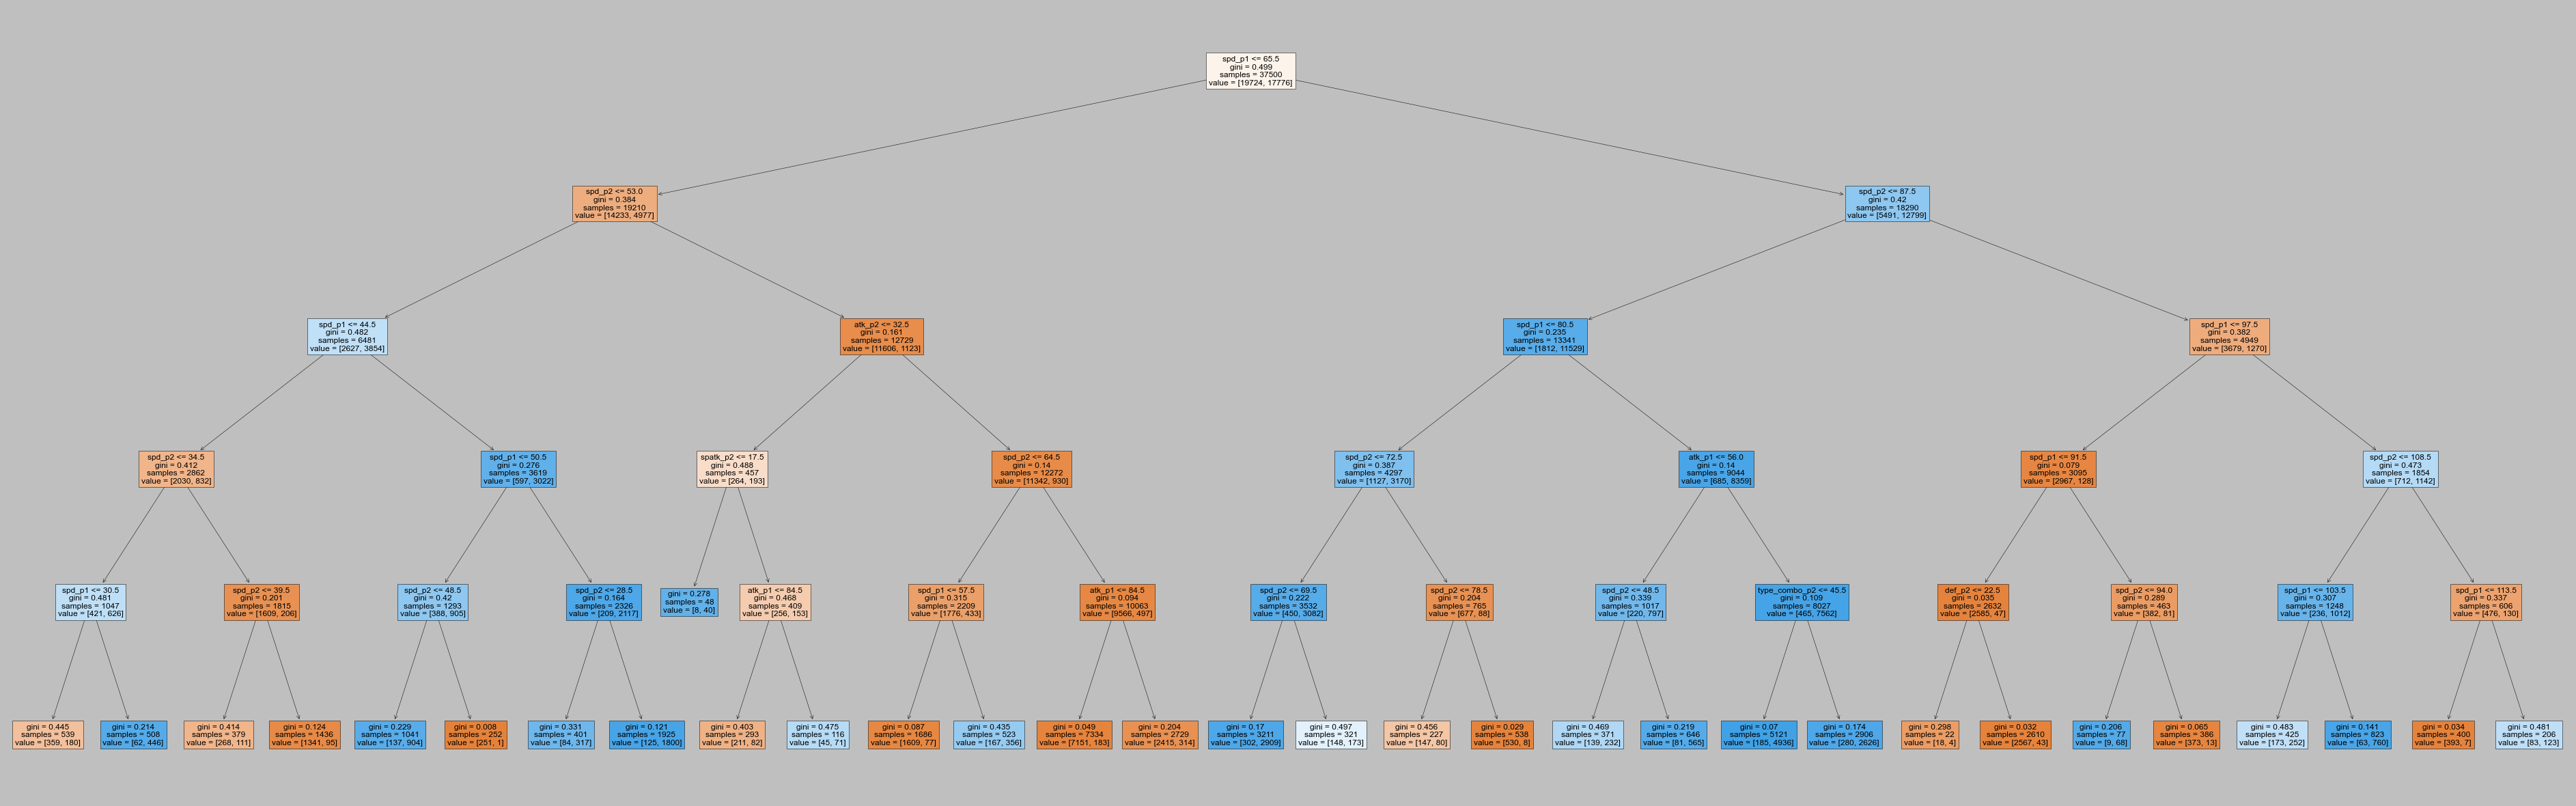

In [267]:
plt.style.use('grayscale')
plt.figure(figsize=(60,20))
plot_tree(grid_tree2.best_estimator_, feature_names=X.columns, filled=True, fontsize=12)
plt.show()

In [272]:
grid_tree2.best_estimator_.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 7.17750379e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.69634450e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.91734989e-03, 8.92467110e-05, 1.35578211e-03, 0.00000000e+00,
       5.12819392e-01, 0.00000000e+00, 0.00000000e+00, 1.00627552e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

## Random Forest ##

In [ ]:
# parameters to test
params = {'n_estimators' : [100, 300, 500, 700, 1000],
          'criterion' : ['gini', 'entropy'],
          'max_depth' : list(range(2, 11, 1)),
          'min_samples_split' : [2, 5, 10, 15, 25, 50, 75, 100, 200, 300]}

# instantiate RandomForestClassifier
rfc = RandomForestClassifier()

# instatiate GridSearchCV
grid_rfc = GridSearchCV(rfc, params, cv = 3, scoring=['accuracy', 'precision'], refit='accuracy', verbose = 1, n_jobs = -1)

# fit model to data
grid_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.6min
